### Análisis de texto simple sobre ciencia de datos a partir de la página de wikipedia  

In [14]:
# URL de Wikipedia, artículo sobre ciencia de datos
url = 'https://en.wikipedia.org/wiki/Data_science'

<b>  Paso 1: Obtener los datos</b> <br>
El primer paso en todo proceso de ciencia de datos es obtener los datos. 
Para ello utilizaremos la biblioteca requests:

In [15]:
# Importar la biblioteca de peticiones para obtener el contenido de la página web
import requests

# Obtener el contenido de la página web utilizando la URL proporcionada
text  = requests.get(url).content.decode('utf-8')

# Imprime los 1000 primeros caracteres del contenido obtenido (para inspección inicial)
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feat

<b>Paso 2: Transformación de los datos</b> <br>
El siguiente paso es convertir los datos en la forma adecuada para su procesamiento. En nuestro caso, hemos descargado el código fuente HTML de la página, y tenemos que convertirlo en texto plano.

In [16]:
# Importar la clase HTMLParser del módulo html.parser para analizar el contenido HTML
from html.parser import HTMLParser

# Crear una subclase personalizada de HTMLParser para manejar elementos específicos
class MyHTMLParser(HTMLParser):
    
    # Indicador para saber si estamos procesando un script o una etiqueta de estilo
    script = False
    
    # Cadena para almacenar el texto extraído
    res = ""
    
    # Función llamada cada vez que el analizador encuentra una etiqueta HTML de apertura (<>)
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
            
    # Función llamada cada vez que el analizador encuentra una etiqueta HTML de cierre (</>)        
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
            
    # Función llamada cada vez que el analizador encuentra datos textuales
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

# Crear una instancia de la clase de analizador HTML personalizado
parser = MyHTMLParser()

# Enviar el contenido de la página web al analizador sintáctico para su procesamiento.
parser.feed(text)

# Actualizar la variable "texto" para que contenga el texto extraído tras el tratamiento
text = parser.res

# Imprimir los 1000 primeros caracteres del texto extraído
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 History 5 See also 6 References Toggle the table of contents Data science 48 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Nederlands 日本語 Norsk bokmål Oʻzbekcha / ўзбекча ਪੰਜਾਬੀ P

<b>Paso 3: Obtener ideas</b> <br>
El paso más importante es convertir los datos en algo de lo que podamos extraer información. En nuestro caso, queremos extraer palabras clave del texto y ver cuáles son más significativas. <br>

Utilizaremos la librería de Python llamada <b>RAKE</b> para la extracción de palabras clave. En primer lugar, vamos a instalar esta biblioteca en caso de que no esté presente:

In [5]:
# Esta sección instala la librería nlp_rake usando pip (asumiendo que no esté ya instalada)
# Puede que necesites eliminar este bloque si nlp_rake ya está instalado en tu entorno
import sys
!{sys.executable} -m pip install nlp_rake

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 KB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 KB 9.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 36.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=702d22dea81cab2ef57ddabeeb0731033d71c7833ef6494da7786085e7e4ae8f
  Stored in directory: /home/admindev/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


La funcionalidad principal está disponible en el objeto Rake, que podemos personalizar utilizando algunos parámetros. En nuestro caso, vamos a establecer la longitud mínima de una palabra clave a 5 caracteres, la frecuencia mínima de una palabra clave en el documento a 3, y el número máximo de palabras en una palabra clave - a 2. Eres libre de jugar con otros valores y observar el resultado.

In [17]:
# Importar la biblioteca nlp_rake para la extracción de palabras clave
import nlp_rake

# Crear una instancia del extractor Rake con parámetros específicos
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)

# Aplicar el extractor al texto procesado y almacenar los resultados
res = extractor.apply(text)

# Imprimir las frases de palabras clave extraídas (solo con fines de depuración)
res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.9242424242424243),
 ('information science', 3.9242424242424243),
 ('computer science', 3.9242424242424243),
 ('statistical learning', 3.9),
 ('^ davenport', 3.8),
 ('data analysis', 3.75),
 ('science', 1.9242424242424243),
 ('analysis', 1.75),
 ('insights', 1.6666666666666667),
 ('field', 1.4285714285714286),
 ('computational', 1.25),
 ('statistics', 1.2173913043478262),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Obtuvimos una lista de términos junto con el grado de importancia asociado. 
Como podemos ver, las disciplinas más relevantes, como visualización de datos, aprendizaje automático, minería de datos y big data, están presentes en la lista en las primeras posiciones.

<b>Paso 4: Visualizar el resultado</b> <br>
Los datos se interpretan mejor de forma visual. Por lo tanto, a menudo tiene sentido visualizar los datos para extraer algunas conclusiones. Podemos utilizar la biblioteca matplotlib de Python para trazar una distribución simple de las palabras clave con su relevancia:

In [9]:
# Esta sección instala la librería matplotlib usando pip (asumiendo que no esté ya instalada)
# Puede que necesites eliminar este bloque si matplotlib ya está instalado en tu entorno
import sys
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 28.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 13.3 MB/s eta 0:00:00


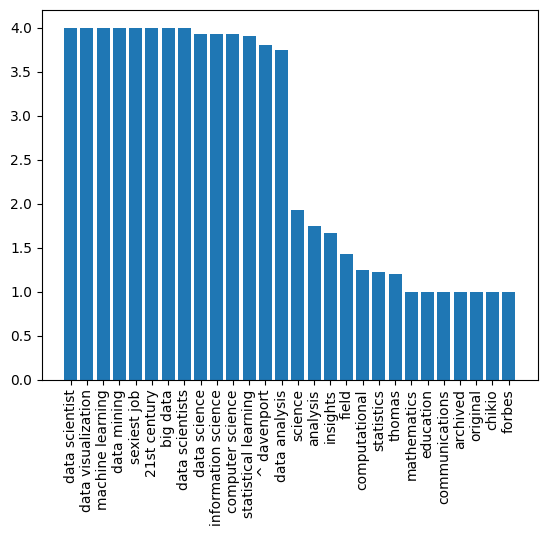

In [18]:
# Importar bibliotecas para la visualización de datos (matplotlib)
import matplotlib.pyplot as plt

# Función para graficar las frases de palabras clave extraídas y sus frecuencias 
# con un gráfico de barras.
def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation = 'vertical')
    plt.show()

# Graficar las frases de palabras clave extraídas y sus frecuencias
plot(res)

Sin embargo, existe una forma aún mejor de visualizar las frecuencias de las palabras: mediante Word Cloud. Tendremos que instalar otra biblioteca para graficar la nube de palabras a partir de nuestra lista de palabras clave.
  

In [11]:
# Esta sección instala la librería wordcloud usando pip (asumiendo que no esté ya instalada)
# Puede que necesites eliminar este bloque si wordcloud ya está instalado en tu entorno
!{sys.executable} -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 4.0 MB/s eta 0:00:00a 0:00:01


El objeto WordCloud es responsable de tomar el texto original, o una lista precalculada de palabras con sus frecuencias, y devuelve una imagen, que puede ser mostrada usando matplotlib:

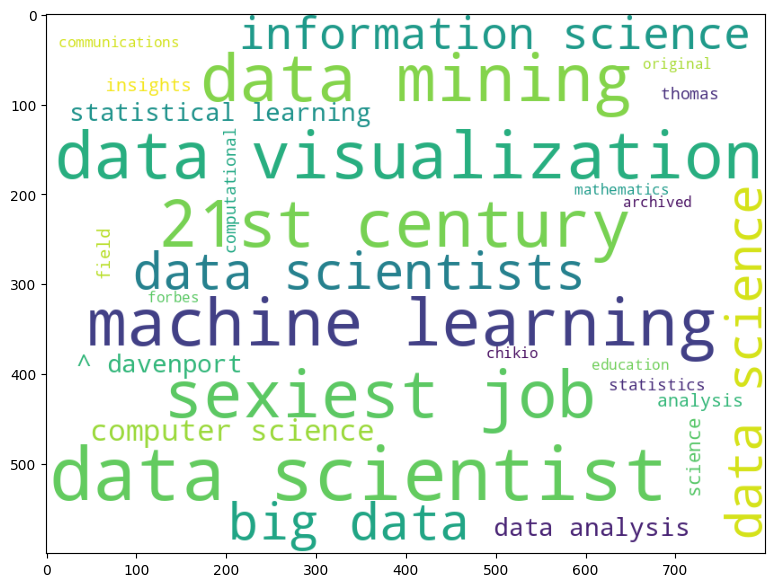

In [19]:
# Importar bibliotecas para generar nubes de palabras
from wordcloud import WordCloud


# Crear un objeto WordCloud con configuraciones específicas
wc  = WordCloud(background_color='white', width=800, height=600)

# Cree una nueva ventana de figura con un tamaño específico 
# (15 pulgadas de ancho, 7 pulgadas de alto)
plt.figure(figsize=(15,7))

# Generar una imagen WordCloud a partir de las frecuencias de las palabras clave extraídas
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res }))

 También podemos pasar el texto original a WordCloud - veamos si somos capaces de obtener un resultado similar:

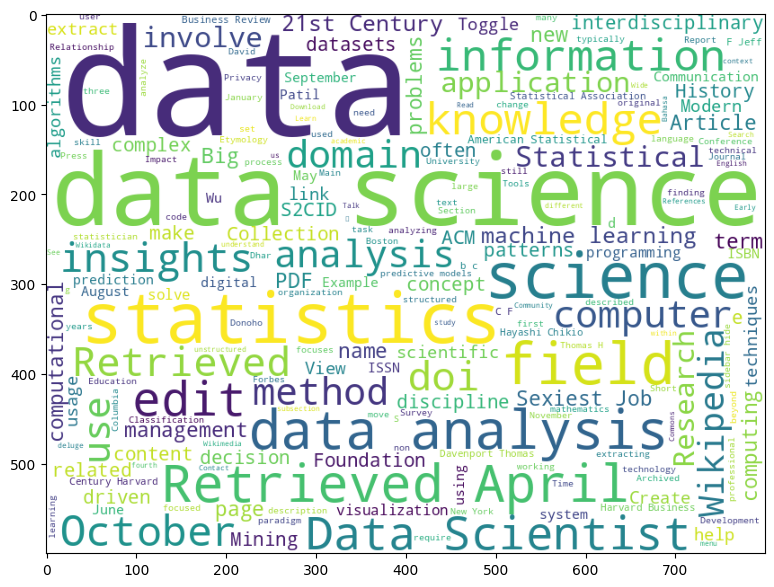

In [29]:
# Crear una nueva ventana de figura con un tamaño específico (15 pulgadas de ancho, 7 pulgadas de alto)
plt.figure(figsize=(15,7))

# Generar una imagen WordCloud a partir de todo el texto procesado
plt.imshow(wc.generate(text))

In [30]:
# Guardar la imagen WordCloud generada como archivo PNG.
wc.generate(text).to_file('images/ds_wordcloud.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as Retrieved on). Also, we get fewer keywords that consist of two words, such as data scientist, or computer science. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.